In [40]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

In [13]:
train_file = 'train.csv'

In [14]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(
    raw_data[:,1:], raw_data[:,0], test_size=0.1)

Text(0.5, 1.0, '28x28 data')

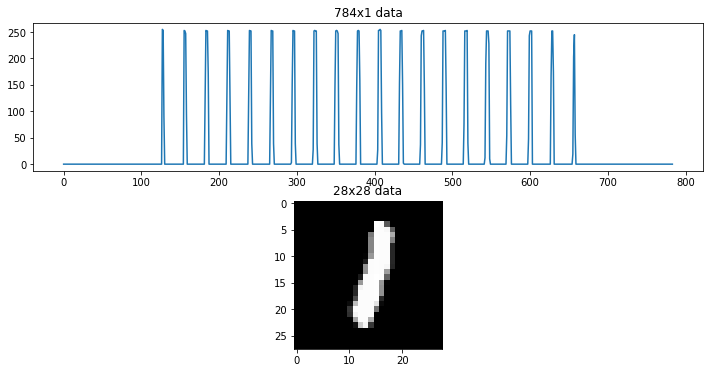

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')

In [16]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [17]:
x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.

In [38]:
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)
#example:
print(y_train[0])

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [47]:
model = keras.Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D( 16, (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D( 16, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D( 16, (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [50]:
datagen = keras.preprocessing.image.ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [52]:
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate =1e-4), metrics=["accuracy"])


In [54]:
annealer = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)


In [56]:
hist = model.fit(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val[:400,:], y_val[:400,:]), #For speed
                           callbacks=[annealer])

Epoch 1/20


InvalidArgumentError:  Can not squeeze dim[2], expected a dimension of 1, got 2
	 [[node categorical_crossentropy/remove_squeezable_dimensions/Squeeze (defined at <ipython-input-55-ca11557833f3>:1) ]] [Op:__inference_train_function_1656]

Function call stack:
train_function
